## Imports, Reading Data, Setting up tests

In [2]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [3]:
training_data = pd.read_csv('/home/ec2-user/capstone/broadband-capstone/data/broadband_training_bin_2.csv')
test_data = pd.read_csv('/home/ec2-user/capstone/broadband-capstone/data/broadband_test_bin_2.csv')

In [3]:
all_vars = list(training_data.columns.values[(training_data.dtypes=='float64') | (training_data.dtypes=='int')])
remove_vars = ['pct_health_ins_children','pct_health_ins_19_64','pct_health_ins_65+']

for i in remove_vars:
    all_vars.remove(i)

In [4]:
broadband_vars = ['MaxAdDown',
                 'MaxAdUp',
                 'Wired_Provider_Count',
                 'Satellite_Provider_Count',
                 'Fixed_Wireless_Provider_Count',
                 'All_Provider_Count_25',
                 'All_Provider_Count_100',
                 'Fixed_Wireless_Provider_Count_25',
                 'Wired_Provider_Count_25',
                 'Satellite_Provider_Count_25',
                 'Fixed_Wireless_Provider_Count_100',
                 'Wired_Provider_Count_100',
                 'Satellite_Provider_Count_100',
                 'pct_internet',
                 'pct_internet_dial_up',
                 'pct_internet_broadband_any_type',
                 'pct_internet_cellular',
                 'pct_only_cellular',
                 'pct_internet_broadband_fiber',
                 'pct_internet_broadband_satellite',
                 'pct_internet_only_satellite',
                 'pct_internet_other',
                 'pct_internet_no_subscrp',
                 'pct_internet_none',
                 'pct_computer',
                 'pct_computer_with_dialup',
                 'pct_computer_with_broadband',
                 'pct_computer_no_internet',
                 'pct_no_computer',
                 'Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 'Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps)',
                 'Ookla Median Download Speed (Mbps)',
                 'Ookla Median Upload Speed (Mbps)',
                 '0_5_providers',
                 '6_10_providers',
                 '11_15_providers',
                 '16_20_providers',
                 '20+_providers',
                 '0_25_MaxAdDown',
                 '25_99_MaxAdDown',
                 '99_499_MaxAdDown',
                 '499_inf_MaxAdDown',
                 '0_25_Ookla Median Download Speed (Mbps)',
                 '25_99_Ookla Median Download Speed (Mbps)',
                 '99_499_Ookla Median Download Speed (Mbps)',
                 '499_inf_Ookla Median Download Speed (Mbps)',
                 '0_25_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '25_99_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '99_499_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '499_inf_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 'single_provider',
                 'Primary RUCA Code - 1.0',
                 'Primary RUCA Code - 2.0',
                 'Primary RUCA Code - 4.0',
                 'Primary RUCA Code - 10.0',
                 'Primary RUCA Code - 7.0',
                 'Primary RUCA Code - 5.0',
                 'Primary RUCA Code - 8.0',
                 'Primary RUCA Code - 3.0',
                 'Primary RUCA Code - 6.0',
                 'Primary RUCA Code - 9.0',
                 'Primary RUCA Code - 99.0',
                 'Secondary RUCA Code - 1.0',
                 'Secondary RUCA Code - 2.0',
                 'Secondary RUCA Code - 4.0',
                 'Secondary RUCA Code - 10.0',
                 'Secondary RUCA Code - 7.0',
                 'Secondary RUCA Code - 5.0',
                 'Secondary RUCA Code - 1.1',
                 'Secondary RUCA Code - 8.0',
                 'Secondary RUCA Code - 3.0',
                 'Secondary RUCA Code - 6.0',
                 'Secondary RUCA Code - 9.0',
                 'Secondary RUCA Code - 4.1',
                 'Secondary RUCA Code - 99.0',
                 'Secondary RUCA Code - 7.1',
                 'Secondary RUCA Code - 10.2',
                 'Secondary RUCA Code - 2.1',
                 'Secondary RUCA Code - 10.1',
                 'Secondary RUCA Code - 10.3',
                 'Secondary RUCA Code - 7.2',
                 'Secondary RUCA Code - 5.1',
                 'Secondary RUCA Code - 8.1',
                 'Secondary RUCA Code - 8.2',
                 'SE',
                 'INFA',
                 'DDI',
                 'ruca_metro',
                 'ruca_micro',
                 'ruca_small_town',
                 'ruca_rural',
                 'Comcast_present',
                 'ATT_present',
                 'HughesNet_present',
                 'GCI_Comm_Corp_present',
                 'ViaSat_present',
                 'VSAT_present',
                 'Century_Link_present',
                 'Spectrum_present',
                 'Crown_Castle_present',
                 'Etheric_present',
                 'Frontier_Communications_present']

## Modeling

### Functions

In [9]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [17]:
Y_train = np.array(training_data['pct_health_ins_19_64'])
Y_test = np.array(test_data['pct_health_ins_19_64'])

def XGBoost_model(train_df, 
                          test_df, 
                          variable_list,
                          Y_train = Y_train,  
                          Y_test = Y_test):
    train_variables = np.array(train_df[variable_list])
    test_variables = np.array(test_df[variable_list])
    
    model = XGBRegressor().fit(train_variables, Y_train)
    predicted = model.predict(test_variables)
    
    regression_results(Y_test, predicted)
    
    return pd.DataFrame(model.feature_importances_, 
                        index = variable_list).sort_values(by=0, ascending = False)


In [6]:
feature_importance_all_vars = XGBoost_model(training_data, 
                                            test_data, 
                                            all_vars) 


explained_variance:  0.7611
r2:  0.7611
MAE:  3.502
MSE:  22.6217
RMSE:  4.7562


From the all_vars model, we can pick the top variables to use in the grid search. 

<AxesSubplot:>

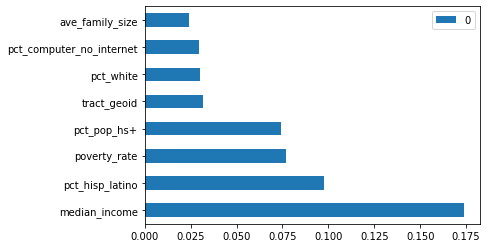

In [8]:
feature_importance_all_vars.head(8).plot.barh()

In [19]:
feature_importance_all_vars.head(7).index.values

array(['median_income', 'pct_hisp_latino', 'poverty_rate', 'pct_pop_hs+',
       'tract_geoid', 'pct_white', 'pct_computer_no_internet'],
      dtype=object)

In [20]:
key_vars = ['median_income', 
            'pct_hisp_latino', 
            'poverty_rate', 
            'pct_pop_hs+',
            'tract_geoid', 
            'pct_white', 
            'pct_computer_no_internet']

### Similar idea but for broadband vars

In [19]:
feature_importance_broadband_vars = XGBoost_model(training_data, 
                                                  test_data, 
                                                  broadband_vars) 


explained_variance:  0.4942
r2:  0.4942
MAE:  5.027
MSE:  47.8944
RMSE:  6.9206


<AxesSubplot:>

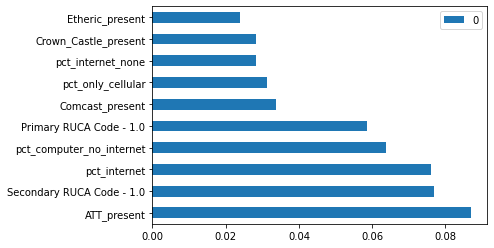

In [23]:
feature_importance_broadband_vars.head(10).plot.barh()

In [5]:
#key_vars = feature_importance_broadband_vars.head(7).index.values
key_vars = ['ATT_present', 
            'Secondary RUCA Code - 1.0', 
            'pct_internet', 
            'pct_computer_no_internet',
            'Primary RUCA Code - 1.0',
            'Comcast_present',
            'pct_only_cellular']

## Tuning the model

In [26]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

regressor_tuned = XGBRegressor()

regress = RandomizedSearchCV(estimator=regressor_tuned, 
                             param_distributions=params,
                             scoring='neg_mean_squared_error', 
                             verbose=10,
                             n_iter = 20,
                             cv = 3,
                             random_state=42)

regress.fit(training_data[key_vars], Y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3; 1/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500
[CV 1/3; 1/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500;, score=-59.878 total time=   4.2s
[CV 2/3; 1/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500
[CV 2/3; 1/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500;, score=-58.706 total time=   4.2s
[CV 3/3; 1/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500
[CV 3/3; 1/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500;, score=-58.872 total time=   4.2s
[CV 1/3; 2/20] START colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=500
[CV 1/3; 2/20] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=500;, score=-60.854 total time=  10.7s
[CV 2/3; 2/20] START colsample_bytree=0.7, learning_rate=0.1, max_depth

[CV 2/3; 13/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, n_estimators=1000;, score=-63.534 total time=  21.5s
[CV 3/3; 13/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=10, n_estimators=1000
[CV 3/3; 13/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, n_estimators=1000;, score=-63.844 total time=  21.6s
[CV 1/3; 14/20] START colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100
[CV 1/3; 14/20] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100;, score=-1082.111 total time=   1.3s
[CV 2/3; 14/20] START colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100
[CV 2/3; 14/20] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100;, score=-1089.132 total time=   1.3s
[CV 3/3; 14/20] START colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100
[CV 3/3; 14/20] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100;, score=-10

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                       

In [27]:
print("Best parameters:", regress.best_params_)
print("Lowest RMSE: ", (-regress.best_score_)**(1/2.0))
y_pred = regress.predict(test_data[key_vars])

regression_results(Y_test, y_pred)

Best parameters: {'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Lowest RMSE:  7.645042421626354
explained_variance:  0.3813
r2:  0.3812
MAE:  5.6287
MSE:  58.5923
RMSE:  7.6546


---

### Limiting to Cali Data

In [6]:
cali_train_data = training_data[training_data.state == 6]
cali_test_data = test_data[test_data.state == 6]

In [10]:
regressor = XGBRegressor(n_estimators = 1000, max_depth = 6, learning_rate = 0.01, colsample_bytree = 0.7)
regressor.fit(cali_train_data[key_vars],  np.array(cali_train_data['pct_health_ins_19_64']))
predictions = regressor.predict(cali_test_data[key_vars])
regression_results(np.array(cali_test_data['pct_health_ins_19_64']), predictions)

explained_variance:  0.4892
r2:  0.4892
MAE:  4.0504
MSE:  30.8888
RMSE:  5.5578
